In [7]:
import pandas as pd  ##load the necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("regression_data.csv")

df.head()

Saving regression_data.csv to regression_data (2).csv


,7129300520,10/13/14,3,1,1180,5650,1.1,0,0.1,3.1,...,1180.1,0.2,1955,0.3,98178,47.5112,-122.257,1340,5650.1,221900
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [9]:
archivo_csv = "regression_data.csv"

primera_fila = pd.read_csv(archivo_csv, nrows=1, header=None)  ##The first row appears as column names, but they are data. We adjust the values as data and name the columns.

nombres_columnas = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

df = pd.read_csv(archivo_csv, header=None, skiprows=0, names=nombres_columnas) #We use skiprows to move the first row to index 0.

columnas_numericas = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)  #visualize the data types

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(df.head())   #see the results

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object
           id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      808

In [10]:
df  #visualize the DataFrame with the modifications.

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [11]:
df.dtypes   #We check again because on other occasions, modifying it led to changes in data types

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [12]:
df.isnull().sum()   #check for the presence of null values.

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [13]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])  #confirm the percentage of data that contains null or NaN values , show 0, It means that there are no null or NaN values
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage


In [14]:
numerical = df.select_dtypes(include='number')  #Verify numeric variables
numerical

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [15]:
categoricals = df.select_dtypes(include='object')  #Verify categoric variable
categoricals

,date
0,10/13/14
1,12/9/14
2,2/25/15
3,12/9/14
4,2/18/15
...,...
21592,5/21/14
21593,2/23/15
21594,6/23/14
21595,1/16/15


In [16]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y', errors='coerce') #change the date to the desired readable format

# Format the date column as 'DD-MM-YYYY'
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

# Verify the changes
print(df.dtypes)
print(df.head())

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object
           id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  13-10-2014         3       1.00         1180      5650     1.0   
1  6414100192  09-12-2014         3       2.25         2570      7242     2.0   
2  5631500400  25-02-2015         2       1.00          770     10000     1.0   
3  2487200875  09-12-2014         4       3.00         1960      5000     1.0   
4  1954400510  18-02-2015         3       2.00         1

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')  #Change the data type of the date column from object to the correct type.

print(df.dtypes)
print(df.head())

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object
           id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1

In [18]:
new_processed_df = df

In [19]:
new_processed_df.to_csv(r'C:\Users\User\Downloads\regression_datafinal.csv', index=False)   #new df with the changes

In [20]:
correlation_matrix = numerical.corr()     #create the correlation matrix
correlation_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


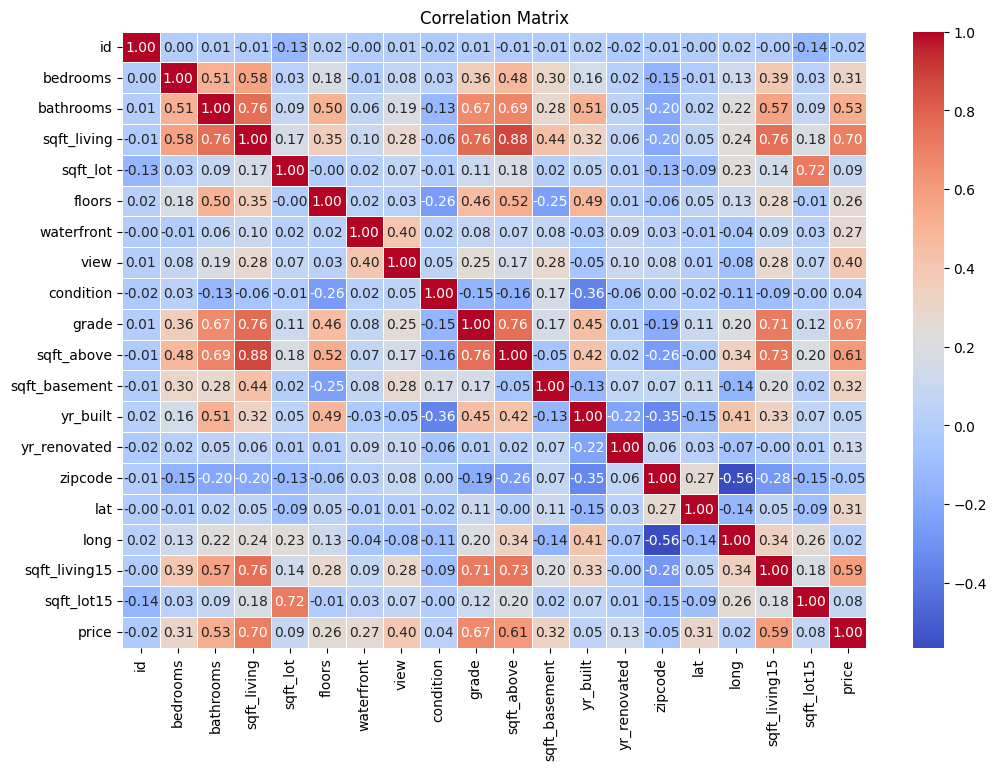

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## **Ploting variables with the highest correlation**

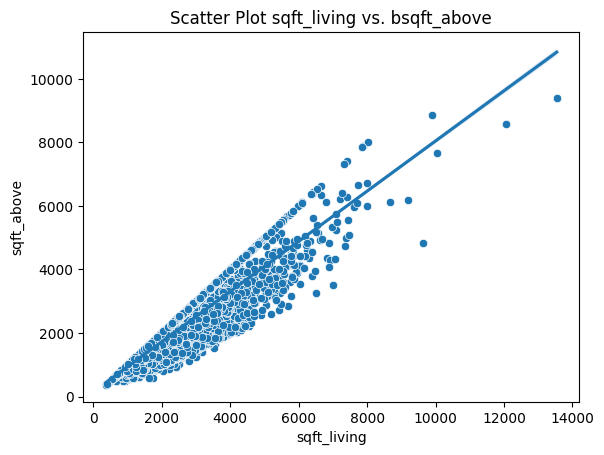

In [22]:
sns.scatterplot(x='sqft_living', y='sqft_above', data=df) # sqft_living vs. bathrroms correlation.88
sns.regplot(x='sqft_living', y='sqft_above', data=df, scatter=False)
plt.title('Scatter Plot sqft_living vs. bsqft_above')
plt.show()

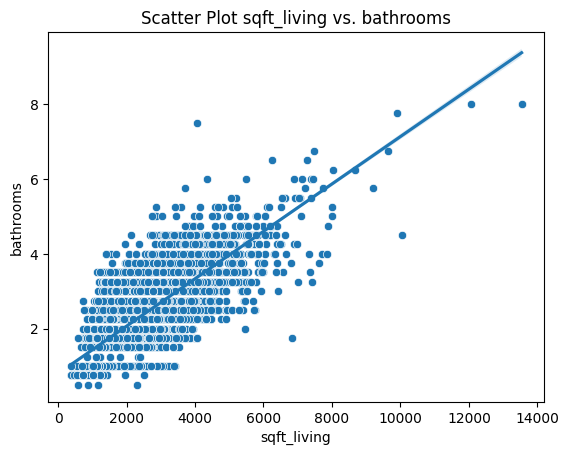

In [23]:
sns.scatterplot(x='sqft_living', y='bathrooms', data=df) #sqft_living vs. bathrroms correlation.77
sns.regplot(x='sqft_living', y='bathrooms', data=df, scatter=False)
plt.title('Scatter Plot sqft_living vs. bathrooms')
plt.show()

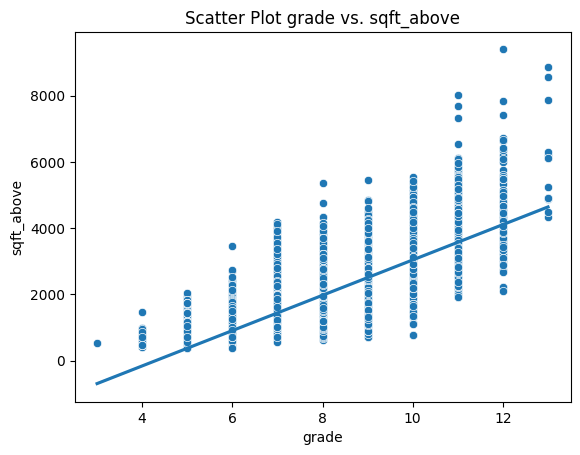

In [24]:
sns.scatterplot(x='grade', y='sqft_above', data=df) #grade vs. sqft_above correlation.76
sns.regplot(x='grade', y='sqft_above', data=df, scatter=False)
plt.title('Scatter Plot grade vs. sqft_above')
plt.show()

In [25]:
zipcode_count = df['zipcode'].nunique()   #Checking how many unique values the 'zipcode' column has to determine the count being evaluated

print(f"The 'zipcode' column has {zipcode_count} distinct values.")


The 'zipcode' column has 70 distinct values.


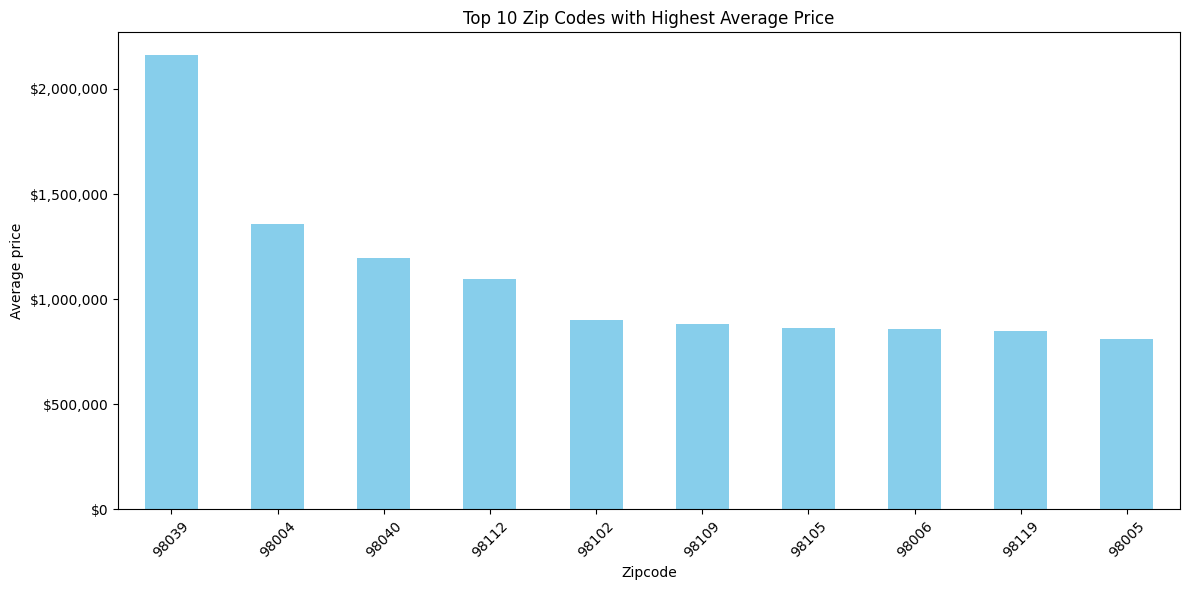

In [26]:
avg_prices_per_zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)


top_10_zipcodes = avg_prices_per_zipcode.head(10)       # Select the top 10 zip codes with the highest average prices

plt.figure(figsize=(12, 6))

top_10_zipcodes.plot(kind='bar', color='skyblue', rot=45, ax=plt.gca())
plt.title('Top 10 Zip Codes with Highest Average Price')
plt.xlabel('Zipcode')
plt.ylabel('Average price')

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))  #This lambda function formats numbers as currency, using commas as thousands separators and representing values with two decimal places, with the dollar symbol at the beginning
plt.tight_layout()
plt.show()


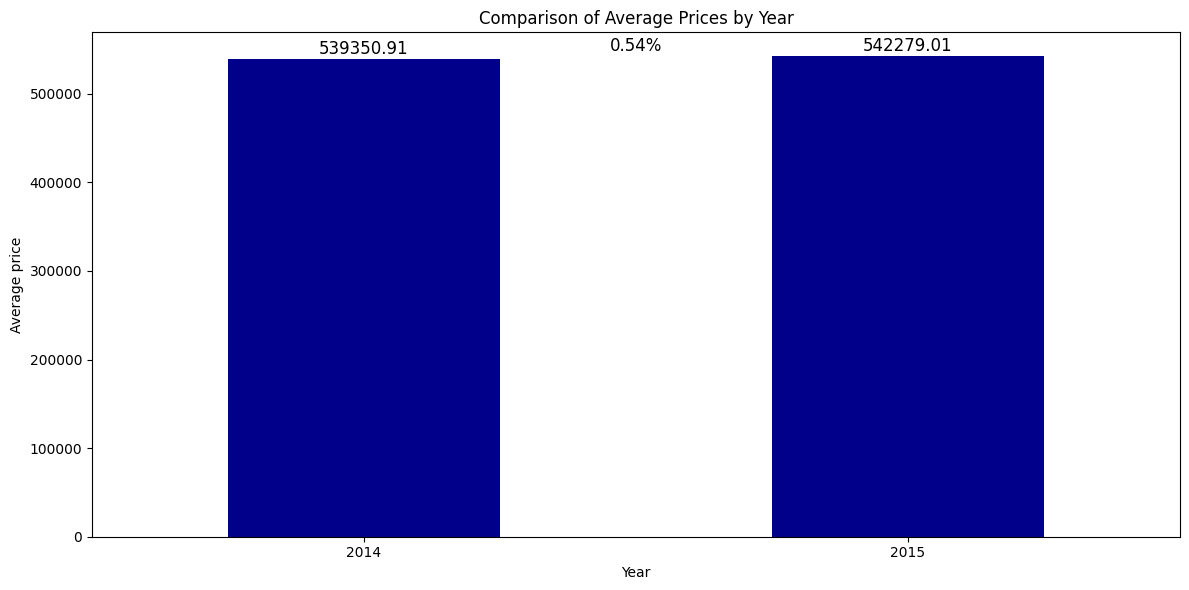

In [27]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')   #Here, we aimed to compare the variation in average sale prices between 2014 and 2015

df['year'] = df['date'].dt.year

avg_prices_per_year = df.groupby('year')['price'].mean()

porcentaje_variacion = ((avg_prices_per_year[2015] - avg_prices_per_year[2014]) / avg_prices_per_year[2014]) * 100

plt.figure(figsize=(12, 6))
ax = avg_prices_per_year.plot(kind='bar', color='darkblue')
plt.title('Comparison of Average Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.xticks(rotation=0)

plt.text(0.5, avg_prices_per_year[2014] + 5000, f'{porcentaje_variacion:.2f}%', ha='center', va='bottom', color='black', fontsize=12)

for i, valor in enumerate(avg_prices_per_year):
    ax.text(i, valor + 1000, f'{valor:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.show()


In [28]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')   #Here, we verify it without creating a plot

df['year'] = df['date'].dt.year

avg_prices_per_year = df.groupby('year')['price'].mean()

porcentaje_variacion = ((avg_prices_per_year[2015] - avg_prices_per_year[2014]) / avg_prices_per_year[2014]) * 100

print(f'Percentage average price Variation between 2014 and 2015: {porcentaje_variacion:.2f}%')


Percentage average price Variation between 2014 and 2015: 0.54%


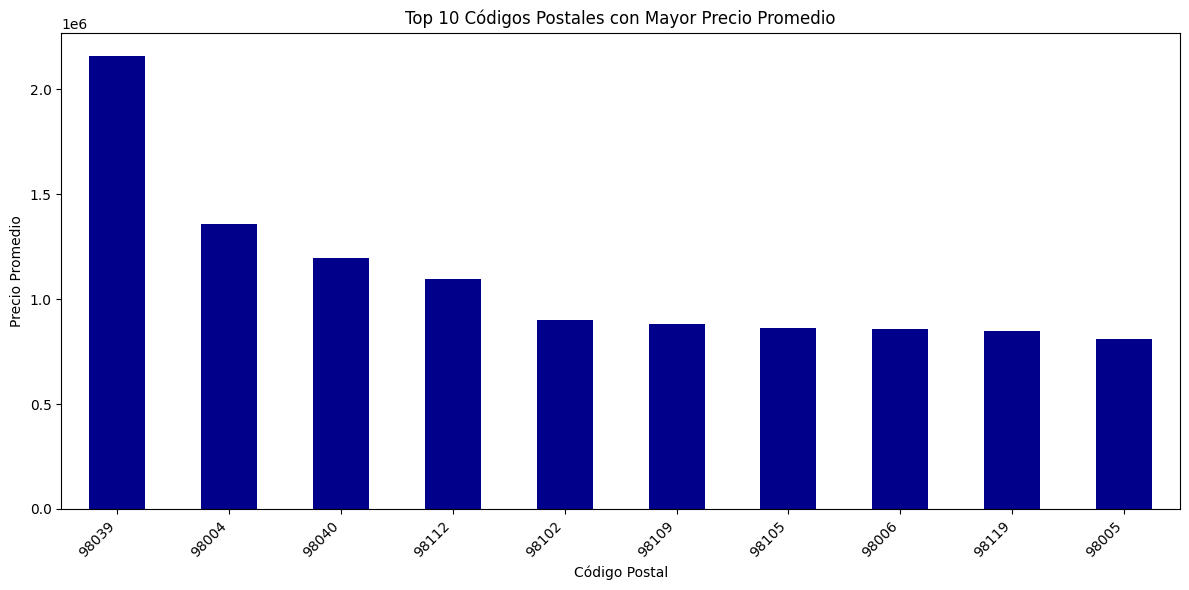

In [30]:

promedio_precios_por_zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)  # CAlculate average prices per zipcode

top_10_zipcodes = promedio_precios_por_zipcode.head(10)

plt.figure(figsize=(12, 6))
top_10_zipcodes.plot(kind='bar', color='darkblue')
plt.title('Top 10 Códigos Postales con Mayor Precio Promedio')
plt.xlabel('Código Postal')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [31]:
df['date'] = pd.to_datetime(df['date'])    #This code Allows analyzing the price variation between 2014 and 2015 for each zip code

df_2014_2015 = df[df['date'].dt.year.isin([2014, 2015])]

promedio_precios_por_zipcode_y_anio = df_2014_2015.groupby(['zipcode', df_2014_2015['date'].dt.year])['price'].mean().unstack()

varianza_precios = promedio_precios_por_zipcode_y_anio[2015] - promedio_precios_por_zipcode_y_anio[2014]

tabla_varianza_precios = pd.DataFrame({'Zipcode': varianza_precios.index, 'Price Variance': varianza_precios.values})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(tabla_varianza_precios.to_string(index=False))


 Zipcode  Price Variance
   98001    18498.139233
   98002      202.727160
   98003     5248.720109
   98004   178082.643436
   98005    22682.909492
   98006    99950.808939
   98007    -4589.091089
   98008       31.194301
   98010     1330.576401
   98011    20370.926389
   98014    -7255.836957
   98019     -870.465787
   98022     4013.804126
   98023      227.818784
   98024    70380.664911
   98027     3679.592154
   98028    22169.823718
   98029     9431.288305
   98030     1990.422038
   98031     6294.318317
   98032     8539.128857
   98033    16431.040509
   98034    27283.313654
   98038    12136.563393
   98039  -719272.349272
   98040    20843.325107
   98042    12620.973389
   98045    59634.200000
   98052    22821.959987
   98053   -13682.841398
   98055    16869.434835
   98056    -5752.617717
   98058    -2016.767522
   98059     -134.773068
   98065    29694.988889
   98070    34086.040128
   98072   -13011.083001
   98074     7846.566987
   98075    12864.528608


In [32]:
df['date'] = pd.to_datetime(df['date'])  #Percentage change in average prices between 2014 and 2015 by zip code

df_2014_2015 = df[df['date'].dt.year.isin([2014, 2015])]

promedio_precios_por_zipcode_y_anio = df_2014_2015.groupby(['zipcode', df_2014_2015['date'].dt.year])['price'].mean().unstack()

porcentaje_cambio_precios = ((promedio_precios_por_zipcode_y_anio[2015] - promedio_precios_por_zipcode_y_anio[2014]) / promedio_precios_por_zipcode_y_anio[2014]) * 100

tabla_porcentaje_cambio = pd.DataFrame({'Zipcode': porcentaje_cambio_precios.index, 'Percentage Change': porcentaje_cambio_precios.values})

tabla_porcentaje_cambio['Percentage Change'] = tabla_porcentaje_cambio['Percentage Change'].astype(str) + '%'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(tabla_porcentaje_cambio)

    Zipcode       Percentage Change
0     98001      6.720465324625595%
1     98002    0.08655572199019812%
2     98003      1.795590048711409%
3     98004     13.736555835539004%
4     98005     2.8228765842183097%
5     98006     12.047605048874251%
6     98007    -0.7419040308594749%
7     98008   0.004831693934753215%
8     98010     0.3144378566537745%
9     98011       4.20157367769439%
10    98014    -1.5860113898529673%
11    98019   -0.20475890054014734%
12    98022     1.2726822250312317%
13    98023    0.07947131662618712%
14    98024      12.59387501573081%
15    98027     0.5974142436684582%
16    98028     4.8745061695449445%
17    98029     1.5462657144369267%
18    98030      0.673799548691697%
19    98031       2.11096095370224%
20    98032      3.433501012048922%
21    98033     2.0573107702218363%
22    98034     5.3118602283118594%
23    98038      3.346147891968897%
24    98039    -30.629350508504587%
25    98040     1.7537252091103617%
26    98042      4.112761879

In [33]:
houses_over_650k = df[df["price"] > 650000]

# Imprime las casas filtradas
print(houses_over_650k.head(100))

             id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
5    7237550310 2014-05-12         4       4.50         5420    101930     1.0           0     0   
10   1736800520 2015-04-03         3       2.50         3560      9796     1.0           0     0   
21   2524049179 2014-08-26         3       2.75         3050     44867     1.0           0     4   
26   1794500383 2014-06-26         3       1.75         2450      2691     2.0           0     0   
27   3303700376 2014-12-01         3       1.00         1400      1581     1.5           0     0   
29   1873100390 2015-03-02         4       2.50         2570      7173     2.0           0     0   
32    461000390 2014-06-24         4       1.75         2330      5000     1.5           0     0   
35   9547205180 2014-06-13         3       2.50         2300      3060     1.5           0     0   
41   7766200013 2014-08-11         4       2.25         4220     24186     1.0           0     0   


In [34]:
houses_over_650k

Output hidden; open in https://colab.research.google.com to view.

In [35]:
houses_3_4_bedrooms = houses_over_650k[ (houses_over_650k["bedrooms"] >= 3) & (houses_over_650k["bedrooms"] <= 4) ]

print(houses_3_4_bedrooms)  #Filter houses priced over 650k with 3 to 4 bedrooms

               id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
5      7237550310 2014-05-12         4       4.50         5420    101930     1.0           0   
10     1736800520 2015-04-03         3       2.50         3560      9796     1.0           0   
21     2524049179 2014-08-26         3       2.75         3050     44867     1.0           0   
26     1794500383 2014-06-26         3       1.75         2450      2691     2.0           0   
27     3303700376 2014-12-01         3       1.00         1400      1581     1.5           0   
29     1873100390 2015-03-02         4       2.50         2570      7173     2.0           0   
32      461000390 2014-06-24         4       1.75         2330      5000     1.5           0   
35     9547205180 2014-06-13         3       2.50         2300      3060     1.5           0   
41     7766200013 2014-08-11         4       2.25         4220     24186     1.0           0   
43     9270200160 2014-10-28         3  

In [36]:
houses_3_4_bedrooms   #just to know the houses that cost > than 650k and have 3 or 4 bedrooms

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pip install --pre pycaret   #using pycaret library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.2 MB/s e

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install blosc2==2.0.0

In [37]:
import pandas as pd   #loading dataframe to work with pycaret library
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/regression_datafinal.csv'
dataset = pd.read_csv(file_path)

print(dataset.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  7129300520  2014-10-13         3       1.00         1180      5650     1.0           0     0   
1  6414100192  2014-12-09         3       2.25         2570      7242     2.0           0     0   
2  5631500400  2015-02-25         2       1.00          770     10000     1.0           0     0   
3  2487200875  2014-12-09         4       3.00         1960      5000     1.0           0     0   
4  1954400510  2015-02-18         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0          3      7        1180              0      1955             0    98178  47.5112 -122.257   
1          3      7        2170            400      1951          1991    

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.12.0 which is incompatible.


In [ ]:
!pip install scipy==1.10.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!pip install fastapi python-multipart uvicorn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.4 MB/s eta 0:00:00


In [39]:

from pycaret.regression import * #Setting up and preprocessing specific data before training regression models
exp = setup(data=dataset, target='price')


,Description,Value
0,Session id,2707
1,Target,price
2,Target type,Regression
3,Original data shape,"(21597, 21)"
4,Transformed data shape,"(21597, 21)"
5,Transformed train set shape,"(15117, 21)"
6,Transformed test set shape,"(6480, 21)"
7,Numeric features,19
8,Categorical features,1
9,Preprocess,True


In [40]:
best_model = compare_models()  # Comparing models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,68567.8190,17061849680.3904,129283.2939,0.8783,0.1721,0.1288,2.5780
et,Extra Trees Regressor,70682.0108,17266678996.5469,130624.4709,0.8751,0.1783,0.1321,5.6760
rf,Random Forest Regressor,70576.9376,17354655574.4651,130784.4075,0.8745,0.1769,0.1310,13.6200
xgboost,Extreme Gradient Boosting,69892.9998,18235238260.9439,133142.2878,0.8710,0.1749,0.1301,0.5020
gbr,Gradient Boosting Regressor,78431.2733,18817493052.9410,136422.5040,0.8631,0.1924,0.1490,3.6160
dt,Decision Tree Regressor,103230.9957,34959725337.2521,185881.7166,0.7441,0.2555,0.1887,0.2640
ridge,Ridge Regression,126973.4366,42040757917.4561,204438.9636,0.6947,0.4131,0.2563,0.0930
br,Bayesian Ridge,126973.1527,42041131855.1329,204439.8685,0.6947,0.4132,0.2563,0.1620
llar,Lasso Least Angle Regression,126990.8072,42038915960.0688,204435.1292,0.6947,0.4141,0.2564,0.1160
lasso,Lasso Regression,126990.8079,42038915939.5131,204435.1292,0.6947,0.4141,0.2564,0.4450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [41]:
lightgbm_model = create_model('lightgbm') #Comparing the best model that has yielded results for us

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67869.6041,14809863780.0866,121695.7837,0.8836,0.1692,0.1262
1,73709.6114,27100140788.0937,164621.2039,0.8362,0.1757,0.1314
2,64969.0531,11476024205.7664,107126.2069,0.9104,0.1657,0.1255
3,67392.1714,14437331689.5009,120155.4480,0.8991,0.1658,0.1264
4,64817.4754,13049731695.8565,114235.4222,0.8816,0.1688,0.1263
5,70927.2079,16402149343.6920,128070.8763,0.8774,0.1749,0.1295
6,74755.6830,25619423443.8726,160060.6868,0.8492,0.1786,0.1330
7,67967.4263,19869374764.9719,140958.7697,0.8696,0.1748,0.1316
8,65872.5965,13043956008.7286,114210.1397,0.8797,0.1779,0.1303


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
new_data_1 = pd.read_csv('C:\\Users\\User\\Downloads\\regression_datafinal.csv')

# Hacer predicciones en nuevos datos
predictions_lightgbm = predict_model(lightgbm_model, data=new_data_1)
print (predictions_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,58859.6811,9766380638.0503,98825.0001,0.9276,0.1585,0.1186


               id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      7129300520  2014-10-13         3       1.00         1180      5650     1.0           0   
1      6414100192  2014-12-09         3       2.25         2570      7242     2.0           0   
2      5631500400  2015-02-25         2       1.00          770     10000     1.0           0   
3      2487200875  2014-12-09         4       3.00         1960      5000     1.0           0   
4      1954400510  2015-02-18         3       2.00         1680      8080     1.0           0   
...           ...         ...       ...        ...          ...       ...     ...         ...   
21592   263000018  2014-05-21         3       2.50         1530      1131     3.0           0   
21593  6600060120  2015-02-23         4       2.50         2310      5813     2.0           0   
21594  1523300141  2014-06-23         2       0.75         1020      1350     2.0           0   
21595   291310100  2015-01-16 

In [43]:
predictions_lightgbm

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.511200,-122.257004,1340,5650,221900,235744.064459
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.721001,-122.319000,1690,7639,538000,498531.780491
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.737900,-122.233002,2720,8062,180000,312140.387739
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.520802,-122.392998,1360,5000,604000,453053.461521
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.616798,-122.044998,1800,7503,510000,494975.405557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.699299,-122.346001,1530,1509,360000,434593.718016
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.510700,-122.362000,1830,7200,400000,460323.476965
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.594398,-122.299004,1020,2007,402101,332511.123561
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.534500,-122.069000,1410,1287,400000,429913.749602


In [44]:
predictions_lightgbm [predictions_lightgbm['price']> predictions_lightgbm['prediction_label']] #Filter by houses that cost more than the price predicted by the LGBM mode

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.721001,-122.319000,1690,7639,538000,498531.780491
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.520802,-122.392998,1360,5000,604000,453053.461521
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.616798,-122.044998,1800,7503,510000,494975.405557
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,0,1963,0,98198,47.409500,-122.315002,1650,9711,291850,205822.307727
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,0,2003,0,98038,47.368401,-122.030998,2390,7570,323000,310505.879071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,3448900210,2014-10-14,4,2.50,2520,6023,2.0,0,0,3,...,0,2014,0,98056,47.513699,-122.167000,2520,6023,610685,576861.303966
21590,7936000429,2015-03-26,4,3.50,3510,7200,2.0,0,0,3,...,910,2009,0,98136,47.553699,-122.398003,2050,6200,1010000,942641.021972
21591,2997800021,2015-02-19,3,2.50,1310,1294,2.0,0,0,3,...,130,2008,0,98116,47.577301,-122.408997,1330,1265,475000,423498.842939
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.594398,-122.299004,1020,2007,402101,332511.123561


In [45]:
predictions_lightgbm [predictions_lightgbm['price']< predictions_lightgbm['prediction_label']] #Filter by houses that cost less than the price predicted by the LGBM mode

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.511200,-122.257004,1340,5650,221900,2.357441e+05
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.737900,-122.233002,2720,8062,180000,3.121404e+05
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.656101,-122.004997,4760,101930,1230000,1.385195e+06
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,0,1995,0,98003,47.309700,-122.327003,2238,6819,257500,2.584872e+05
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,730,1960,0,98146,47.512299,-122.336998,1780,8113,229500,2.844020e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,844000965,2014-06-26,3,1.75,1500,11968,1.0,0,0,3,...,0,2014,0,98010,47.309502,-122.001999,1320,11303,224000,2.694693e+05
21587,7852140040,2014-08-25,3,2.50,2270,5536,2.0,0,0,3,...,0,2003,0,98065,47.538898,-121.880997,2270,5731,507250,5.365594e+05
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.699299,-122.346001,1530,1509,360000,4.345937e+05
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.510700,-122.362000,1830,7200,400000,4.603235e+05


In [46]:
rf_model = create_model('rf') #ahora vamos a comparar otro modelolo que tambien tiene un precision alta

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,69762.8415,16640253390.4527,128997.1061,0.8692,0.1724,0.1285
1,76440.1896,26585565611.4337,163050.8068,0.8393,0.1824,0.1354
2,68205.6028,14788609776.9997,121608.4281,0.8845,0.1722,0.1287
3,69304.8654,15277966724.0374,123604.0724,0.8932,0.1705,0.1274
4,66683.3697,13643364465.9019,116804.8135,0.8762,0.1731,0.1275
5,73800.6274,22583169884.9127,150276.9772,0.8312,0.1761,0.1297
6,76785.8999,21660358884.8130,147174.5864,0.8725,0.1827,0.1348
7,70359.8160,15209911127.6247,123328.4684,0.9002,0.1828,0.1365
8,68318.7861,14175711923.3603,119061.7988,0.8693,0.1859,0.1343


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
new_data_1 = pd.read_csv('C:\\Users\\User\\Downloads\\regression_datafinal.csv')

predictions_rf = predict_model(rf_model, data=new_data_1)
print (predictions_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,38963.6706,6553760488.7530,80955.2993,0.9514,0.1141,0.0740


               id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      7129300520  2014-10-13         3       1.00         1180      5650     1.0           0   
1      6414100192  2014-12-09         3       2.25         2570      7242     2.0           0   
2      5631500400  2015-02-25         2       1.00          770     10000     1.0           0   
3      2487200875  2014-12-09         4       3.00         1960      5000     1.0           0   
4      1954400510  2015-02-18         3       2.00         1680      8080     1.0           0   
...           ...         ...       ...        ...          ...       ...     ...         ...   
21592   263000018  2014-05-21         3       2.50         1530      1131     3.0           0   
21593  6600060120  2015-02-23         4       2.50         2310      5813     2.0           0   
21594  1523300141  2014-06-23         2       0.75         1020      1350     2.0           0   
21595   291310100  2015-01-16 

In [48]:
predictions_rf

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.511200,-122.257004,1340,5650,221900,221602.32
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.721001,-122.319000,1690,7639,538000,512383.50
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.737900,-122.233002,2720,8062,180000,290223.60
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.520802,-122.392998,1360,5000,604000,555155.50
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.616798,-122.044998,1800,7503,510000,505714.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.699299,-122.346001,1530,1509,360000,369584.50
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.510700,-122.362000,1830,7200,400000,404036.99
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.594398,-122.299004,1020,2007,402101,383092.71
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.534500,-122.069000,1410,1287,400000,394291.26


In [49]:
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,124519.6364,43074232916.3656,207543.3278,0.6614,0.4570,0.2513
1,131377.7250,54663877917.8581,233803.0751,0.6696,0.3662,0.2599
2,123565.0830,37766681528.9660,194336.5162,0.7051,0.4125,0.2569
3,127026.9776,42068531200.0530,205106.1462,0.7060,0.4259,0.2550
4,122928.4926,34835825355.3193,186643.5784,0.6840,0.3977,0.2552
5,128936.1829,41532961769.1221,203796.3733,0.6896,0.3906,0.2557
6,131320.9500,50860442453.7002,225522.5985,0.7007,0.4844,0.2531
7,128299.4904,45721597764.8635,213826.0923,0.6999,0.4090,0.2583
8,127030.5551,35830419685.3321,189289.2487,0.6696,0.4258,0.2664


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
new_data_1 = pd.read_csv('C:\\Users\\User\\Downloads\\regression_datafinal.csv')

predictions_lr = predict_model(lr_model, data=new_data_1)
print (predictions_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,126465.4471,40348253410.2831,200868.7467,0.7010,0.4225,0.2571


               id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      7129300520  2014-10-13         3       1.00         1180      5650     1.0           0   
1      6414100192  2014-12-09         3       2.25         2570      7242     2.0           0   
2      5631500400  2015-02-25         2       1.00          770     10000     1.0           0   
3      2487200875  2014-12-09         4       3.00         1960      5000     1.0           0   
4      1954400510  2015-02-18         3       2.00         1680      8080     1.0           0   
...           ...         ...       ...        ...          ...       ...     ...         ...   
21592   263000018  2014-05-21         3       2.50         1530      1131     3.0           0   
21593  6600060120  2015-02-23         4       2.50         2310      5813     2.0           0   
21594  1523300141  2014-06-23         2       0.75         1020      1350     2.0           0   
21595   291310100  2015-01-16 

In [51]:
predictions_lr

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.511200,-122.257004,1340,5650,221900,264078.958647
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.721001,-122.319000,1690,7639,538000,760987.701388
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.737900,-122.233002,2720,8062,180000,376414.956043
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.520802,-122.392998,1360,5000,604000,485857.293969
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.616798,-122.044998,1800,7503,510000,435450.773132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.699299,-122.346001,1530,1509,360000,475055.282743
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.510700,-122.362000,1830,7200,400000,418701.866988
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.594398,-122.299004,1020,2007,402101,131875.690853
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.534500,-122.069000,1410,1287,400000,389624.900342


Here we are going to apply the first model we learned in classes, and also compare its accuracy with the LR model obtained from PyCaret

In [52]:
from sklearn.model_selection import train_test_split    #Here, we apply the first model we learned in classes, and also compare its accuracy with the lr model obtained from PyCaret
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

categorical_cols = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


R2 Score: 0.6911583603393128
Mean Squared Error (MSE): 40216209460.73893
Root Mean Squared Error (RMSE): 200539.7952046898
Mean Absolute Error (MAE): 125781.26024215604


In [53]:
from sklearn.linear_model import LinearRegression

variables = ['sqft_living', 'bedrooms', 'bathrooms', 'yr_built']

model = LinearRegression()
model.fit(X_train[variables], y_train)

y_pred = model.predict(X_test[variables])
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


R2 Score: 0.5359074062261096
Root Mean Squared Error (RMSE): 245830.04533501796


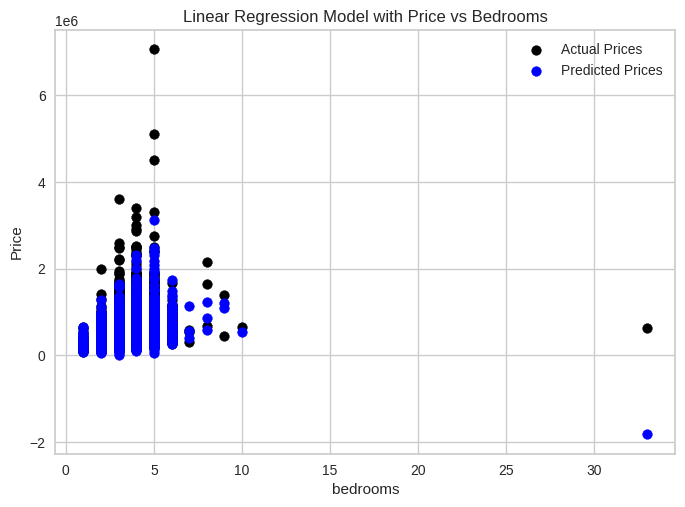

In [54]:
plt.scatter(X_test['bedrooms'], y_test, color='black', label='Actual Prices')

y_pred = model.predict(X_test[variables])
plt.scatter(X_test['bedrooms'], y_pred, color='blue', label='Predicted Prices')

plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.title('Linear Regression Model with Price vs Bedrooms')
plt.legend()
plt.show()


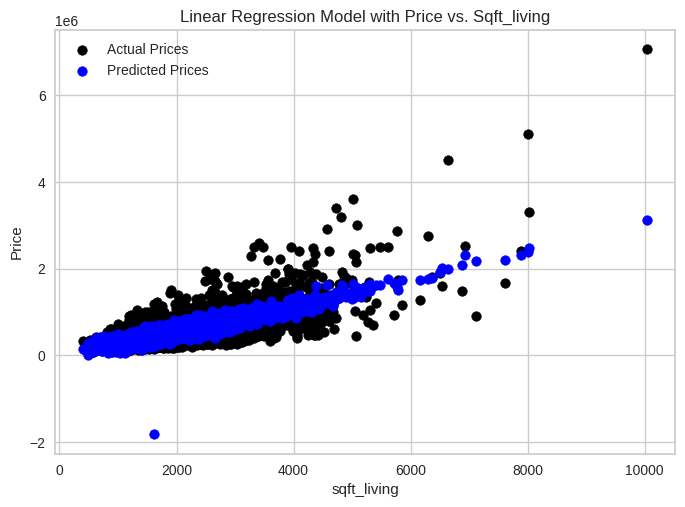

In [55]:
plt.scatter(X_test['sqft_living'], y_test, color='black', label='Actual Prices')

y_pred = model.predict(X_test[variables])
plt.scatter(X_test['sqft_living'], y_pred, color='blue', label='Predicted Prices')

plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Linear Regression Model with Price vs. Sqft_living')
plt.legend()
plt.show()

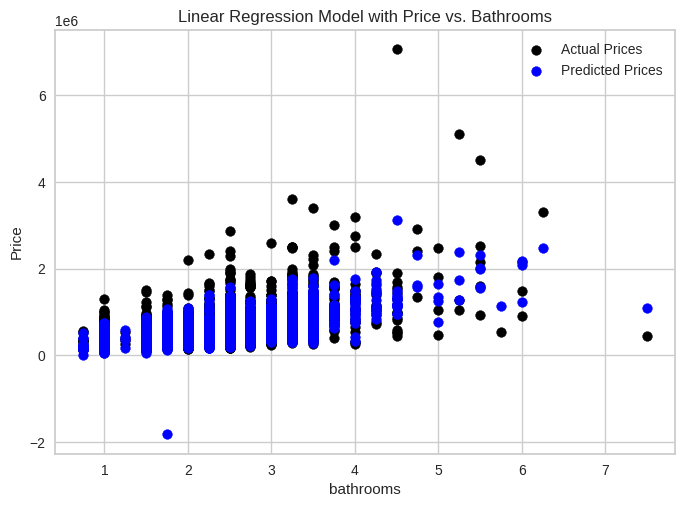

In [56]:
plt.scatter(X_test['bathrooms'], y_test, color='black', label='Actual Prices')

y_pred = model.predict(X_test[variables])
plt.scatter(X_test['bathrooms'], y_pred, color='blue', label='Predicted Prices')

plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.title('Linear Regression Model with Price vs. Bathrooms')
plt.legend()
plt.show()

Visualizing the combined results of the predictions from the three applied models

In [57]:
indice_prediccion = predictions_lightgbm.index

predictions_df = pd.DataFrame({
    'LightGBM Predictions': predictions_lightgbm['prediction_label'],
    'Random Forest Predictions': predictions_rf['prediction_label'],
    'Linear Regression Predictions': predictions_lr['prediction_label']
}, index=indice_prediccion)

# Mostrar el DataFrame
print(predictions_df)


       LightGBM Predictions  Random Forest Predictions  Linear Regression Predictions
0             235744.064459                  221602.32                  264078.958647
1             498531.780491                  512383.50                  760987.701388
2             312140.387739                  290223.60                  376414.956043
3             453053.461521                  555155.50                  485857.293969
4             494975.405557                  505714.50                  435450.773132
...                     ...                        ...                            ...
21592         434593.718016                  369584.50                  475055.282743
21593         460323.476965                  404036.99                  418701.866988
21594         332511.123561                  383092.71                  131875.690853
21595         429913.749602                  394291.26                  389624.900342
21596         321256.265515                  370751.55

In [58]:
predictions_df.index = df.index

df_with_predictions = pd.concat([df, predictions_df], axis=1)   #Concatenate DataFrames along columns

df_with_predictions


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,LightGBM Predictions,Random Forest Predictions,Linear Regression Predictions
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,2014,235744.064459,221602.32,264078.958647
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,2014,498531.780491,512383.50,760987.701388
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,2015,312140.387739,290223.60,376414.956043
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,2014,453053.461521,555155.50,485857.293969
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,2015,494975.405557,505714.50,435450.773132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,360000,2014,434593.718016,369584.50,475055.282743
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,400000,2015,460323.476965,404036.99,418701.866988
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,402101,2014,332511.123561,383092.71,131875.690853
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,400000,2015,429913.749602,394291.26,389624.900342


In [64]:
df_with_predictions.to_csv(r'C:\Users\User\Downloads\regression_datafinalprd.csv', index=False)

